In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# create list to hold cities
cities = []

#identify nearest city for each set of coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # add unique cities to cities list
    if city not in cities:
        cities.append(city)
        
#print city count to confirm we have the right number
len(cities)

582

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | ler
Processing Record 5 of Set 1 | diphu
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | pontianak
Processing Record 9 of Set 1 | beberibe
Processing Record 10 of Set 1 | narsaq
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | marcona
City not found. Skipping...
Processing Record 15 of Set 1 | hailar
Processing Record 16 of Set 1 | darnah
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | fortuna
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | faanui
Processing Record 23 of

Processing Record 38 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 39 of Set 4 | lorengau
Processing Record 40 of Set 4 | wadi musa
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | barra do bugres
Processing Record 43 of Set 4 | sao filipe
Processing Record 44 of Set 4 | bagdarin
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | college
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | san quintin
Processing Record 1 of Set 5 | chokurdakh
Processing Record 2 of Set 5 | tual
Processing Record 3 of Set 5 | nemuro
Processing Record 4 of Set 5 | agirish
Processing Record 5 of Set 5 | umm lajj
Processing Record 6 of Set 5 | bunia
Processing Record 7 of Set 5 | sierpc
Processing Record 8 of Set 5 | cherskiy
Processing Record 9 of Set 5 | paamiut
Processing Record 10 of Set 5 | garowe
Processing Record 11 of 

Processing Record 31 of Set 8 | nha trang
Processing Record 32 of Set 8 | codrington
Processing Record 33 of Set 8 | cuamba
Processing Record 34 of Set 8 | sabla
Processing Record 35 of Set 8 | ardakan
Processing Record 36 of Set 8 | da nang
Processing Record 37 of Set 8 | taksimo
Processing Record 38 of Set 8 | suntar
Processing Record 39 of Set 8 | verkhoyansk
Processing Record 40 of Set 8 | orsk
Processing Record 41 of Set 8 | akyab
Processing Record 42 of Set 8 | auki
Processing Record 43 of Set 8 | touros
Processing Record 44 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 45 of Set 8 | kigoma
Processing Record 46 of Set 8 | rochester
Processing Record 47 of Set 8 | wuwei
Processing Record 48 of Set 8 | port hedland
Processing Record 49 of Set 8 | sai buri
Processing Record 50 of Set 8 | imbituba
Processing Record 1 of Set 9 | ngukurr
City not found. Skipping...
Processing Record 2 of Set 9 | pemba
Processing Record 3 of Set 9 | illintsi
Processing Record 4 of S

Processing Record 19 of Set 12 | tucuman
Processing Record 20 of Set 12 | zhangjiakou
Processing Record 21 of Set 12 | ozinki
Processing Record 22 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 23 of Set 12 | marsh harbour
Processing Record 24 of Set 12 | bitung
Processing Record 25 of Set 12 | sault sainte marie
Processing Record 26 of Set 12 | were ilu
Processing Record 27 of Set 12 | puerto quijarro
Processing Record 28 of Set 12 | aasiaat
Processing Record 29 of Set 12 | merauke
Processing Record 30 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 31 of Set 12 | arroyo
Processing Record 32 of Set 12 | baykit
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-23.98,93,73,8.19,RU,2022-02-18 01:11:54
1,Atuona,-9.8000,-139.0333,78.69,76,4,18.86,PF,2022-02-18 01:11:55
2,Mataura,-46.1927,168.8643,72.48,39,100,5.68,NZ,2022-02-18 01:11:55
3,Ler,8.3018,30.1418,80.51,17,89,4.47,SS,2022-02-18 01:11:56
4,Diphu,25.8333,93.4333,55.26,66,2,0.76,IN,2022-02-18 01:11:56
5,Qaanaaq,77.4840,-69.3632,-10.73,84,100,7.27,GL,2022-02-18 01:11:56
6,Cape Town,-33.9258,18.4232,67.10,72,0,1.01,ZA,2022-02-18 01:11:57
7,Pontianak,-0.0333,109.3333,76.98,88,20,5.75,ID,2022-02-18 01:11:57
8,Beberibe,-4.1797,-38.1306,82.44,84,0,7.72,BR,2022-02-18 01:11:57
9,Narsaq,60.9167,-46.0500,0.36,75,100,8.68,GL,2022-02-18 01:11:58


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-02-18 01:11:54,71.9167,114.0833,-23.98,93,73,8.19
1,Atuona,PF,2022-02-18 01:11:55,-9.8000,-139.0333,78.69,76,4,18.86
2,Mataura,NZ,2022-02-18 01:11:55,-46.1927,168.8643,72.48,39,100,5.68
3,Ler,SS,2022-02-18 01:11:56,8.3018,30.1418,80.51,17,89,4.47
4,Diphu,IN,2022-02-18 01:11:56,25.8333,93.4333,55.26,66,2,0.76
...,...,...,...,...,...,...,...,...,...
532,Aasiaat,GL,2022-02-18 01:39:12,68.7098,-52.8699,-7.55,100,100,6.71
533,Merauke,ID,2022-02-18 01:39:13,-8.4667,140.3333,85.06,66,83,4.72
534,Petropavlovsk-Kamchatskiy,RU,2022-02-18 01:39:13,53.0452,158.6483,26.78,86,100,2.24
535,Arroyo,ES,2022-02-18 01:39:13,41.6096,-4.7969,49.19,71,1,3.44


In [14]:
# create output csv file
output_data_file = "Weather_Data/cities.csv"
# export to csv
city_data_df.to_csv(output_data_file, index_label="city_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1645148443.1508327

In [18]:
today = time.strftime("%x")
today

'02/17/22'

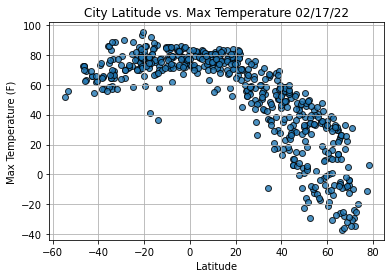

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

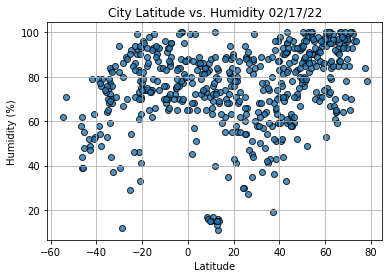

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()